In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import tensorflow as tf
from src.nnetwork import model as md

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

data_folder = "C:\\Dev\\Smart Car Project\\Dataset-prep\\"

nv_path = data_folder + "nvidia\\"
nv_bl2_path = data_folder + "nvidia-blur2\\"
nv_bl4_path = data_folder + "nvidia-blur4\\"
nv_bl8_path = data_folder + "nvidia-blur8\\"

sm_path = data_folder + "self-made\\"
sm_bl2_path = data_folder + "self-made-blur2\\"
sm_bl4_path = data_folder + "self-made-blur4\\"
sm_bl8_path = data_folder + "self-made-blur8\\"

nv_paths = [nv_path, nv_bl2_path, nv_bl4_path, nv_bl8_path]
sm_paths = [sm_path, sm_bl2_path, sm_bl4_path, sm_bl8_path]

paths = nv_paths + sm_paths

remove_flag = False
mirror_flag = False

c:\program files\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\program files\python38\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\program files\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [6]:
from src.preprocess.remove import remove

if remove_flag:
    for path in nv_paths:
        remove (path)

In [7]:
from src.preprocess.augmentation import mirror_images

if mirror_flag:
    for path in nv_paths:
        mirror_images("output.csv", "output-aug.csv", path)

In [8]:
from src.nnetwork.model import load_data

train_gens = {}
valid_gens = {}

for path in nv_paths:
    train_gens[path], valid_gens[path] = load_data("output-aug.csv", path, pre_shuffle=True, batch_size=64, seed=41,
                                                   target_size=(256, 455))

for path in sm_paths:
    train_gens[path], valid_gens[path] = load_data("output-aug.csv", path, pre_shuffle=True, batch_size=64, seed=41)

Found 72650 non-validated image filenames.
Found 18162 non-validated image filenames.
Found 72650 non-validated image filenames.
Found 18162 non-validated image filenames.
Found 72650 non-validated image filenames.


KeyboardInterrupt: 

In [ ]:
sm_model = md.compile_model(md.model_jnet(0, 96, 0, 0), lr=1e-3)
md.fit_model(sm_model, train_gens[sm_path], valid_gens[sm_path], sm_path + "JNET-b64-s41-lr3-e70", epochs=70,
             max_queue_size=32, workers=8)

In [ ]:
nv_model = md.compile_model(md.model_jnet(130, 96, 90, 0), lr=1e-3)
md.fit_model(nv_model, train_gens[nv_path], valid_gens[nv_path], nv_path + "JNET-b64-s42-lr3-e70", epochs=70,
             max_queue_size=32, workers=8)

In [ ]:
# RESULTS GRAPH NO. 1
sm_hist = md.load_history(sm_path + "JNET-b64-s41-lr3-e70", "history.csv")
md.plot_history(sm_hist, sm_path + "JNET-b64-s41-lr3-e70")

In [2]:
# RESULTS GRAPH NO. 2
model_names = ["model-006-0.009", "model-013-0.006", "model-028-0.004", "model-067-0.003"]
plot_labels = ["Epoch 06", "Epoch 13", "Epoch 28", "Epoch 67"]
preds_list = [None] * len(model_names)

for index, name in enumerate(model_names):
    temp_model = md.load_model(sm_path + "JNET-b64-s41-lr3-e70", name)
    preds_list[index], labels = md.get_predictions(temp_model, sm_path, "output-aug.csv", (240, 320), percentage=0.005, seed=40)

md.plot_predictions(preds_list, plot_labels, labels, sm_path + "JNET-b64-s41-lr3-e70", "epochs.png", linewidth=0.5,
                    fontsize="x-small", title='Steering Angle Value Predictions for different Epochs')

Found 304 non-validated image filenames.
Found 304 non-validated image filenames.
Found 304 non-validated image filenames.
Found 304 non-validated image filenames.


Found 1216 non-validated image filenames.


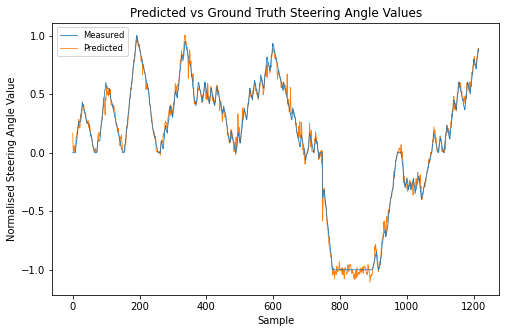

In [5]:
# RESULTS GRAPH NO. 3
sm_model = md.load_model(sm_path + "JNET-b64-s41-lr3-e70", "model-067-0.003")
preds, labels = md.get_predictions(sm_model, sm_path, "output-aug.csv", (240, 320), seed=40, percentage=0.02)
md.plot_predictions(preds, 'Predicted', labels, sm_path + "JNET-b64-s41-lr3-e70", "baseline.png", linewidth=0.8,
                    figsize=(8, 5))

Found 1207 non-validated image filenames.


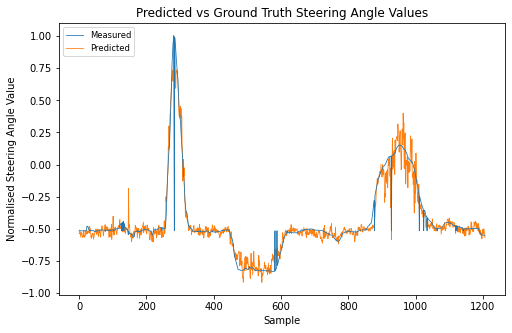

In [8]:
# RESULTS GRAPH NO. 4
nv_model = md.load_model(nv_path + "JNET-b64-s42-lr3-e0_33c", "model-033-0.001")
preds, labels = md.get_predictions(nv_model, nv_path, "output-aug.csv", (256, 455), seed=40, percentage=0.0133)
md.plot_predictions(preds, 'Predicted', labels, nv_path + "JNET-b64-s42-lr3-e0_33c", "baseline.png", linewidth=0.8,
                    figsize=(8, 5))

Found 304 non-validated image filenames.
Found 304 non-validated image filenames.
Found 304 non-validated image filenames.
Found 304 non-validated image filenames.


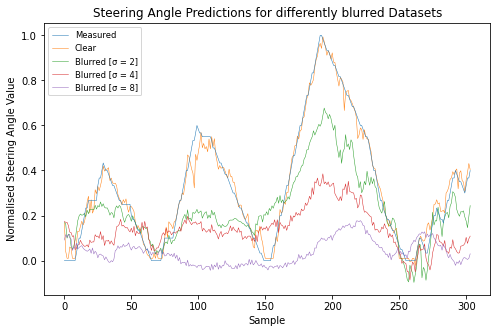

In [21]:
# RESULTS GRAPH NO. 5a
sm_model = md.load_model(sm_path + "JNET-b64-s41-lr3-e70", "model-067-0.003")
preds_1, labels = md.get_predictions(sm_model, sm_path, "output-aug.csv", (240, 320), seed=40, percentage=0.005)
preds_2, _ = md.get_predictions(sm_model, sm_bl2_path, "output-aug.csv", (240, 320), seed=40, percentage=0.005)
preds_3, _ = md.get_predictions(sm_model, sm_bl4_path, "output-aug.csv", (240, 320), seed=40, percentage=0.005)
preds_4, _ = md.get_predictions(sm_model, sm_bl8_path, "output-aug.csv", (240, 320), seed=40, percentage=0.005)

preds_list = [preds_1, preds_2, preds_3, preds_4]
plot_labels = ["Clear", "Blurred [σ = 2]", "Blurred [σ = 4]", "Blurred [σ = 8]"]

md.plot_predictions(preds_list, plot_labels, labels, sm_path + "JNET-b64-s41-lr3-e70", "blurring.png", linewidth=0.5,
                    fontsize="small", title="Steering Angle Predictions for differently blurred Datasets",
                    figsize=(8, 5))

Found 454 non-validated image filenames.
Found 454 non-validated image filenames.
Found 454 non-validated image filenames.
Found 454 non-validated image filenames.


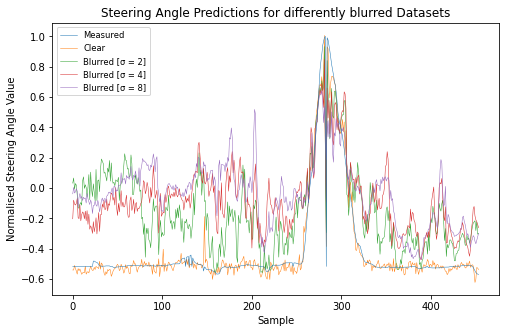

In [19]:
# RESULTS GRAPH NO. 5b
nv_model = md.load_model(nv_path + "JNET-b64-s42-lr3-e0_33c", "model-033-0.001")
preds_1, labels = md.get_predictions(nv_model, nv_path, "output-aug.csv", (256, 455), seed=40, percentage=0.005)
preds_2, _ = md.get_predictions(nv_model, nv_bl2_path, "output-aug.csv", (256, 455), seed=40, percentage=0.005)
preds_3, _ = md.get_predictions(nv_model, nv_bl4_path, "output-aug.csv", (256, 455), seed=40, percentage=0.005)
preds_4, _ = md.get_predictions(nv_model, nv_bl8_path, "output-aug.csv", (256, 455), seed=40, percentage=0.005)

preds_list = [preds_1, preds_2, preds_3, preds_4]
plot_labels = ["Clear", "Blurred [σ = 2]", "Blurred [σ = 4]", "Blurred [σ = 8]"]

md.plot_predictions(preds_list, plot_labels, labels, nv_path + "JNET-b64-s42-lr3-e0_33c", "blurring.png", linewidth=0.5,
                    fontsize="small", title="Steering Angle Predictions for differently blurred Datasets",
                    figsize=(8, 5))

Found 6084 non-validated image filenames.
Found 6084 non-validated image filenames.
Found 6084 non-validated image filenames.
Found 6084 non-validated image filenames.
Found 6084 non-validated image filenames.


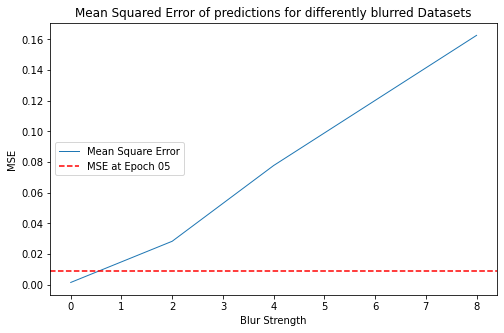

In [2]:
# RESULTS GRAPH NO. 6a
sm_model = md.load_model(sm_path + "JNET-b64-s41-lr3-e70", "model-067-0.003")
preds_1, labels = md.get_predictions(sm_model, sm_path, "output-aug.csv", (240, 320), seed=40, percentage=0.1)
preds_2, _ = md.get_predictions(sm_model, sm_bl2_path, "output-aug.csv", (240, 320), seed=40, percentage=0.1)
preds_3, _ = md.get_predictions(sm_model, sm_bl4_path, "output-aug.csv", (240, 320), seed=40, percentage=0.1)
preds_4, _ = md.get_predictions(sm_model, sm_bl8_path, "output-aug.csv", (240, 320), seed=40, percentage=0.1)

preds_list = [preds_1, preds_2, preds_3, preds_4]
x_values = [0, 2, 4, 8]

sm_model_extra = md.load_model(sm_path + "JNET-b64-s41-lr3-e70", "model-005-0.010")
preds_extra, _ = md.get_predictions(sm_model_extra, sm_path, "output-aug.csv", (240, 320), seed=40, percentage=0.1)

md.plot_mse(preds_list, labels, x_values, preds_extra, 'MSE at Epoch 05', sm_path + "JNET-b64-s41-lr3-e70", figsize=(8, 5),
            fontsize="medium", title="Mean Squared Error of predictions for differently blurred Datasets")

Found 9081 non-validated image filenames.
Found 9081 non-validated image filenames.
Found 9081 non-validated image filenames.
Found 9081 non-validated image filenames.
Found 9081 non-validated image filenames.


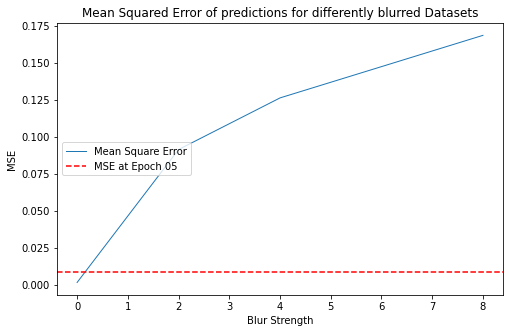

In [3]:
# RESULTS GRAPH NO. 6b
nv_model = md.load_model(nv_path + "JNET-b64-s42-lr3-e0_33c", "model-033-0.001")
preds_1, labels = md.get_predictions(nv_model, nv_path, "output-aug.csv", (256, 455), seed=39, percentage=0.1)
preds_2, _ = md.get_predictions(nv_model, nv_bl2_path, "output-aug.csv", (256, 455), seed=39, percentage=0.1)
preds_3, _ = md.get_predictions(nv_model, nv_bl4_path, "output-aug.csv", (256, 455), seed=39, percentage=0.1)
preds_4, _ = md.get_predictions(nv_model, nv_bl8_path, "output-aug.csv", (256, 455), seed=39, percentage=0.1)

preds_list = [preds_1, preds_2, preds_3, preds_4]
x_values = [0, 2, 4, 8]

nv_model_extra = md.load_model(nv_path + "JNET-b64-s42-lr3-e0_33c", "model-005-0.010")
preds_extra, _ = md.get_predictions(nv_model_extra, nv_path, "output-aug.csv", (256, 455), seed=39, percentage=0.1)

md.plot_mse(preds_list, labels, x_values, preds_extra, 'MSE at Epoch 05', nv_path + "JNET-b64-s42-lr3-e0_33c", figsize=(8, 5),
            fontsize="medium", title="Mean Squared Error of predictions for differently blurred Datasets")

In [3]:
# ABLATION STUDY INVESTIGATING PRE-SHUFFLING
from src.nnetwork.model import load_data

abl_configuration = {"+Pre_+Norm": (True, True),
                     "-Pre_+Norm": (False, True),
                     "+Pre_-Norm": (True, False),
                     "-Pre_-Norm": (False, False)}
abl_train_gens = {}
abl_valid_gens = {}

for key, val in abl_configuration.items():
    abl_train_gens[key], abl_valid_gens[key] = load_data("output-aug.csv", sm_path, pre_shuffle=val[0], batch_size=64,
                                                   seed=35, target_size=(240, 320), shuffle=val[1])

Found 48673 non-validated image filenames.
Found 12168 non-validated image filenames.
Found 48673 non-validated image filenames.
Found 12168 non-validated image filenames.
Found 48673 non-validated image filenames.
Found 12168 non-validated image filenames.
Found 48673 non-validated image filenames.
Found 12168 non-validated image filenames.


In [4]:
for key in abl_configuration:
    model = md.compile_model(md.model_jnet(0, 96, 0, 0), lr=1e-3)

    md.fit_model(model, abl_train_gens[key], abl_valid_gens[key], sm_path + "JNET-b64-s35-lr3-e20-" + key, epochs=20,
             max_queue_size=32, workers=8)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d (Cropping2D)      (None, 144, 320, 3)       0         
_________________________________________________________________
resizing (Resizing)          (None, 65, 320, 3)        0         
_________________________________________________________________
lambda (Lambda)              (None, 65, 320, 3)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 61, 316, 16)       1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 158, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 154, 32)       12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 77, 32)        0

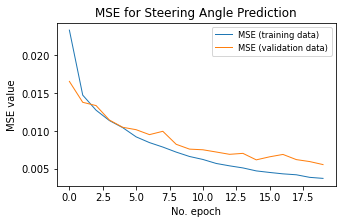

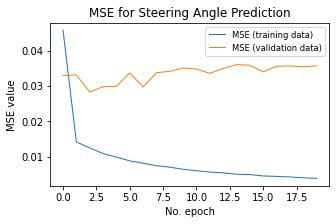

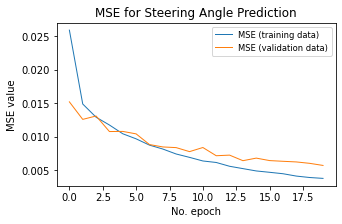

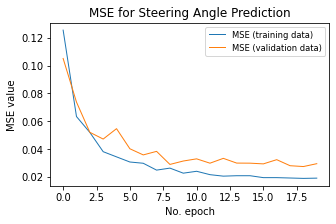

In [6]:
for key in abl_configuration:
    hist = md.load_history(sm_path + "JNET-b64-s35-lr3-e20-" + key, "history.csv")
    md.plot_history(hist, sm_path + "JNET-b64-s35-lr3-e20-" + key)